In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!wget https://github.com/DeepQuestAI/Fire-Smoke-Dataset/releases/download/v1/FIRE-SMOKE-DATASET.zip

In [ ]:
!unzip FIRE-SMOKE-DATASET.zip

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/drive/My Drive/FireDetection/FIRE-SMOKE-DATASET/Train/"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
																			rotation_range=30,
																			height_shift_range=0.2,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/My Drive/FireDetection/FIRE-SMOKE-DATASET/Test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size= 16
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [7]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)             

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>=0.98):
      print('\nReached ^98%')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 10,
    callbacks=[callbacks]
)

Epoch 1/50
10/10 [==============================] - 41s 4s/step - loss: 0.6463 - acc: 0.6187 - val_loss: 0.5622 - val_acc: 0.7250
Epoch 2/50
10/10 [==============================] - 37s 4s/step - loss: 0.5246 - acc: 0.7500 - val_loss: 0.6134 - val_acc: 0.7000
Epoch 3/50
10/10 [==============================] - 41s 4s/step - loss: 0.4980 - acc: 0.7797 - val_loss: 0.5231 - val_acc: 0.7625
Epoch 4/50
10/10 [==============================] - 41s 4s/step - loss: 0.3969 - acc: 0.8156 - val_loss: 0.4343 - val_acc: 0.8000
Epoch 5/50
10/10 [==============================] - 41s 4s/step - loss: 0.3286 - acc: 0.8500 - val_loss: 0.5981 - val_acc: 0.7812
Epoch 6/50
10/10 [==============================] - 42s 4s/step - loss: 0.3382 - acc: 0.8493 - val_loss: 0.4305 - val_acc: 0.8500
Epoch 7/50
10/10 [==============================] - 42s 4s/step - loss: 0.3096 - acc: 0.8687 - val_loss: 0.7788 - val_acc: 0.7375
Epoch 8/50
10/10 [==============================] - 38s 4s/step - loss: 0.3069 - acc: 0.86

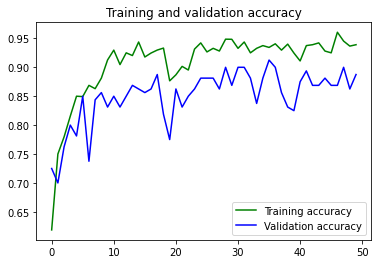

<Figure size 432x288 with 0 Axes>

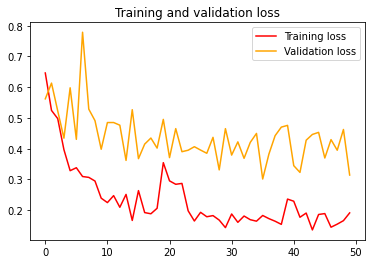

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [10]:
model.save("/content/drive/My Drive/FireDetection/FireCNN.h5")

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving fire1 .jpg to fire1 .jpg
Saving fire2 .jpg to fire2 .jpg
Saving fire3 .jpg to fire3 .jpg
Saving fire4 .jpg to fire4 .jpg
Saving fire5 .jpg to fire5 .jpg
Saving fire6 .jpg to fire6 .jpg
Saving fire7 .jpg to fire7 .jpg
Saving fire8 .jpg to fire8 .jpg
Saving fire9 .jpg to fire9 .jpg
Saving fire10 .jpg to fire10 .jpg
Saving fire11 .jpg to fire11 .jpg
Saving fire12 .jpg to fire12 .jpg
Saving fire13 .jpg to fire13 .jpg
Saving fire14 .jpg to fire14 .jpg
Saving fire15 .jpg to fire15 .jpg
Saving fire16 .jpg to fire16 .jpg
Saving fire17 .jpg to fire17 .jpg
Saving fire18 .jpg to fire18 .jpg
Saving fire19 .jpg to fire19 .jpg
Saving fire20 .jpg to fire20 .jpg
Saving fire21 .jpg to fire21 .jpg
Saving fire22 .jpg to fire22 .jpg
Saving fire23 .jpg to fire23 .jpg
Saving fire24 .jpg to fire24 .jpg
True 0.9896004
True 0.92163515
True 0.9421425
True 0.9990521
True 0.9980034
True 0.9993248
True 0.99564195
True 0.8251114
False 0.8922051
True 0.9993755
True 0.99817586
False 0.78157115
True 0.9974694
T